# Budget Analysis FY 24-25

Step by step process

* Web Data Extraction (Web Scraping) using Goose3 library python
* Data Summarization using model from hugging face - “[facebook/bart-large-cnn](https://huggingface.co/facebook/bart-large-cnn)”
* Using a Financial Model to extract financial data from the summary form the above Summarized Model ,using model from hugging face - “[human-centered-summarization/financial-summarization-pegasus](https://huggingface.co/human-centered-summarization/financial-summarization-pegasus)”.
* For Segmentation Analysis(Sentiment analysis) for the the Summary Extracted we will be using - “[ProsusAI/finbert](https://huggingface.co/ProsusAI/finbert)”.

---

## Web Data Extraction

Downloading the goose3 library

Goose 3 is a Python library that can extract the main content and metadata from any news article or web page. It can also find the most relevant image and video for the article.

In [ ]:
pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=df4e20ba6f47cbcd1207fd24d409ad00e2e80200e84320c4f6274a3dd90c1049
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


---
Web site used here to extract data is from
* [Medium.com](https://www.livemint.com/market/stock-market-news/budget-2024-railways-infra-defence-agri-sectors-that-stand-to-get-major-push-as-listed-by-6-of-top-market-experts-11706859351466.html)

* [thehindu.com](https://www.thehindu.com/business/budget/budget-2024-live-updates-nirmala-sitharaman-presents-interim-budget-february-1/article67796321.ece)


In [ ]:
from goose3 import Goose
my_goose = Goose()
url = "https://www.thehindu.com/business/budget/budget-2024-live-updates-nirmala-sitharaman-presents-interim-budget-february-1/article67796321.ece"
budget = my_goose.extract(url)

In [ ]:
budget.domain # to check if import is working

'www.thehindu.com'

In [ ]:
cleaned = budget.cleaned_text
cleaned = cleaned.replace("\n", "")
cleaned

'The Finance Minister says that the Govt will adopt economic polices that will foster and sustain growth, improve productivity, create opportunities for all, help them enhance capabilities.Guided by the principle of Reform, Perform and Transform, the government will take next-generation reforms, she says.Aligning with the Panchamrut goals, our government will focus on sustaining a more efficient growth. For meeting investment needs, we will build a financial sector with scale, capacity and regulatory frameworks.Development of the East - Our govt. will pay utmost attention to make the Eastern region and its people a powerful driver of India’s growthPM Awas Yojana (Gramin) - Despite the challenges, the implementation continued and we are close to achieving the target of 3 crore houses and 2 crore more houses will be taken up in the next five years. [Read more here...]Rooftop solarization and free electricity - One crore houses will be enabled to obtain upto 300 units of free electricity 

---
Note :

*This project still requires some amount of data cleaning such as - removing the "\\'" make the data more clean. *

---


## Text Summarization

In this section after clearing the data somemore with the help of Regular Expression Library.






```
import re
```





Now we dive into The text summerization where the **Scraped Data** is now Summerized with the help of a model that was taken from hugging face.

In [ ]:
import re
cleaned= re.sub(r"\\(?!')", "'", cleaned) # replace backslash that is not followed by single quote with empty string

In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

After importing the model to the compiler we can successsfully summarize the pipelined modle to the compiler



```
print(summarizer(.__ARTICLE__., max_length=130, min_length=30, do_sample=False))
```



In [ ]:
summerized = (summarizer(cleaned, min_length=50, max_length=360, truncation=True))
summerized #check if summarization has taken place successfully or not

[{'summary_text': 'The Finance Minister says that the Govt will adopt economic polices that will foster and sustain growth, improve productivity, create opportunities for all, help them enhance capabilities. Guided by the principle of Reform, Perform and Transform, the government will take next-generation reforms.'}]

---

## Finincial Text Summarization Model

Human-centered-summarization/financial-summarization-pegasus is a text summarization model that can generate concise and informative summaries of financial news articles. It is based on the PEGASUS model, which is a pre-trained transformer model that uses gap sentences as the self-supervised objective. The model was fine-tuned on a novel financial news dataset, which consists of 2K articles from Bloomberg, on topics such as stock, markets, currencies, rate and cryptocurrencies. The model can capture the main points and the sentiment of the original article, and produce summaries that are relevant for human readers.

You can try out the model on the [Hugging Face website](^1^), where you can enter any financial news article and get a summary in a few seconds. You can also check out the [GitHub repository](^2^) of the model, where you can find the code, the dataset, and some examples of the model outputs. The model was created by the Human Centered Summarization team, who are researchers and students interested in natural language processing and summarization. You can learn more about their work and contact them on their [Hugging Face profile](^2^).

---

```
from transformers import PegasusTokenizer, PegasusForConditionalGeneration, TFPegasusForConditionalGeneration

# Let's load the model and the tokenizer
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name)

# If you want to use the Tensorflow model
# just replace with TFPegasusForConditionalGeneration
```
---



In [ ]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration, TFPegasusForConditionalGeneration

In [ ]:
model_name = "human-centered-summarization/financial-summarization-pegasus"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = TFPegasusForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFPegasusForConditionalGeneration.

Some weights or buffers of the TF 2.0 model TFPegasusForConditionalGeneration were not initialized from the PyTorch model and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tokenizer(cleaned, return_tensors="pt").input_ids

In [ ]:
output = model.generate(
    input_ids,
    max_length=32,
    num_beams=5,
    early_stopping=True
)

# Finally, we can print the generated summary
fin_summerized = tokenizer.decode(output[0], skip_special_tokens=True)
fin_summerized

'Finance Minister says that India will adopt economic polices that will foster and sustain growth. Housing for middle class, medical colleges, Ayushmaan Bharat'

---

## FinBERT model



ProsusAI/finbert is another text analysis model that can perform sentiment analysis on financial texts. It is based on the BERT language model, which is a powerful transformer model that can learn from large amounts of text data. ProsusAI/finbert was fine-tuned on a dataset of financial phrases, which were labeled as positive, negative, or neutral. The model can then classify new financial texts into these three categories, and provide softmax outputs for each label. You can use this model to analyze the sentiment of financial news articles, reports, tweets, or any other text related to finance.



In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch

tokenizer = BertTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = BertForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

inputs = tokenizer(cleaned, return_tensors="pt", padding=True, truncation=True, max_length=512)

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

In [ ]:
# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get logits
logits = outputs.logits

# Apply softmax to convert logits to probabilities
probs = F.softmax(logits, dim=1)

# Extract probability values for each sentiment class
negative_prob = probs[0][0].item()
neutral_prob = probs[0][1].item()
positive_prob = probs[0][2].item()

In [ ]:
# Print probability values for each sentiment class
print("Negative probability:", negative_prob)
print("Neutral probability:", neutral_prob)
print("Positive probability:", positive_prob)

Negative probability: 0.045875925570726395
Neutral probability: 0.9541188478469849
Positive probability: 5.286606665322324e-06


---

After doing the segmentation analysis of the data we normalize the data to the limit of 0 to 1 we plot the analysed data onto a scaled graph to visually represent using **matplotlib**.

---



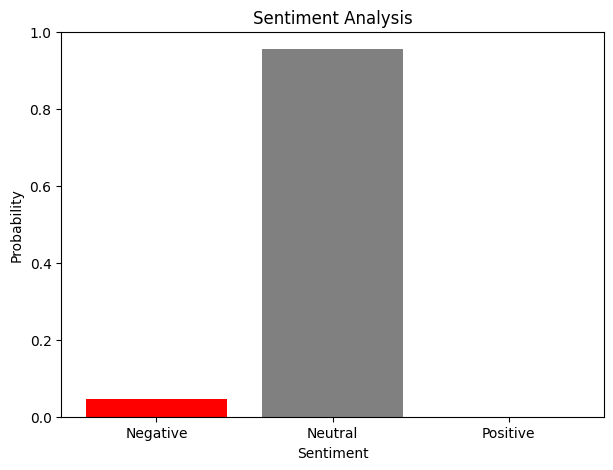

In [ ]:
import matplotlib.pyplot as plt

# Sentiment probabilities
sentiments = ['Negative', 'Neutral', 'Positive']
probs = [negative_prob, neutral_prob, positive_prob]

# Create bar plot
plt.figure(figsize=(7, 5))
plt.bar(sentiments, probs, color=['red', 'grey', 'green'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis limits to ensure values are between 0 and 1
plt.show()
